In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.svm import SVC
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
tumor_data = load_breast_cancer()

In [6]:
tumor_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
tumor = pd.DataFrame(tumor_data['data'],columns=tumor_data['feature_names'])

In [8]:
tumor.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
x = tumor
y = tumor_data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [35]:
svc = SVC()
svc.fit(x_train,y_train)
prediction_svc = svc.predict(x_test)

In [11]:
params = {'C':list(np.arange(0.1,1000,10)),'gamma':list(np.arange(0.00001,1,0.1))}

In [12]:
grid = GridSearchCV(SVC(),params,verbose=3)

In [13]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] .................. C=0.1, gamma=1e-05, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] .................. C=0.1, gamma=1e-05, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] .................. C=0.1, gamma=1e-05, score=0.975, total=   0.0s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] .................. C=0.1, gamma=1e-05, score=0.937, total=   0.0s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] .................. C=0.1, gamma=1e-05, score=0.873, total=   0.0s
[CV] C=0.1, gamma=0.10001 ............................................
[CV] ................ C=0.1, gamma=0.10001, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.10001 ............................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] C=500.1, gamma=1e-05 ............................................
[CV] ................ C=500.1, gamma=1e-05, score=0.950, total=   0.0s
[CV] C=500.1, gamma=1e-05 ............................................
[CV] ................ C=500.1, gamma=1e-05, score=0.938, total=   0.0s
[CV] C=500.1, gamma=1e-05 ............................................
[CV] ................ C=500.1, gamma=1e-05, score=0.988, total=   0.0s
[CV] C=500.1, gamma=1e-05 ............................................
[CV] ................ C=500.1, gamma=1e-05, score=0.949, total=   0.0s
[CV] C=500.1, gamma=1e-05 ............................................
[CV] ................ C=500.1, gamma=1e-05, score=0.962, total=   0.0s
[CV] C=500.1, gamma=0.10001 ..........................................
[CV] .............. C=500.1, gamma=0.10001, score=0.637, total=   0.0s
[CV] C=500.1, gamma=0.10001 ..........................................
[CV] .............. C=500.

[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10.1, 20.1, 30.1, 40.1, 50.1, 60.1, 70.1,
                               80.1, 90.1, 100.1, 110.1, 120.1, 130.1, 140.1,
                               150.1, 160.1, 170.1, 180.1, 190.1, 200.1, 210.1,
                               220.1, 230.1, 240.1, 250.1, 260.1, 270.1, 280.1,
                               290.1, ...],
                         'gamma': [1e-05, 0.10001, 0.20001000000000002,
                                   0.30001000000000005, 0.40001000000000003,
           

In [25]:
grid.best_params_

{'C': 110.1, 'gamma': 1e-05}

In [26]:
grid.best_estimator_

SVC(C=110.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
grid.best_score_

0.962246835443038

In [20]:
prediction_svc = grid.predict(x_test)

CLASSIFICATION REPORT FOR SUPPORT VECTOR CLASSIFIER :
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



ACCURACY SCORE : 94.15204678362574





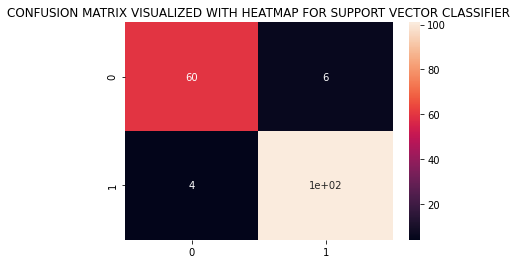

In [24]:
print('CLASSIFICATION REPORT FOR SUPPORT VECTOR CLASSIFIER :\n{}\n\n'.format(classification_report(y_test,prediction_svc)))
print('ACCURACY SCORE : {}\n\n\n'.format(accuracy_score(y_test,prediction_svc)*100))
sns.heatmap(confusion_matrix(y_test,prediction_svc),annot=True)
plt.title('CONFUSION MATRIX VISUALIZED WITH HEATMAP FOR SUPPORT VECTOR CLASSIFIER')
plt.show()